# Importing Libraries

In [128]:
import numpy as np 
import matplotlib.pyplot as plt

# Dataset

In [144]:
# pair of spendings in bookshop of customer and his/her age 
customers = np.array([[23000,54], [15000,59], [16000,46], [1000,18], [19000,44],
                    [300,20], [70, 34], [400,19], [9000,57], [9000,30],
                    [10, 33], [500,11], [22000, 48], [500, 18], [1700, 35]])

mean = np.mean(customers, axis=0)  # axis=0 computes mean across rows
std_dev = np.std(customers, axis=0)  # axis=0 computes std deviation across rows

print("Mean:", mean)
print("Standard Deviation:", std_dev)

Mean: [7832.           35.06666667]
Standard Deviation: [8569.48711028   15.18098225]


# Feature Scaling

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customers = scaler.fit_transform(customers)

print(customers)

[[ 1.77000091  1.24717446]
 [ 0.83645613  1.57653391]
 [ 0.95314923  0.72019934]
 [-0.79724725 -1.1242136 ]
 [ 1.30322852  0.58845555]
 [-0.87893241 -0.99246982]
 [-0.90577183 -0.07026335]
 [-0.86726311 -1.05834171]
 [ 0.13629754  1.44479013]
 [ 0.13629754 -0.33375091]
 [-0.91277341 -0.13613524]
 [-0.8555938  -1.58531683]
 [ 1.65330781  0.85194312]
 [-0.8555938  -1.1242136 ]
 [-0.71556208 -0.00439146]]


# K-means Unsupervised Clustering Algorithm

In [131]:
# np.sqrt((p[0] - q[0]) * (p[0] - q[0]) + (p[1] - q[1]) * (p[1] - q[1]))
def euclidean_distance(p, q):
    return np.sqrt(np.sum((np.array(p) - np.array(q)) ** 2))

In [132]:
def initialize_centroids(dataset, number_of_clusters):
    """Randomly initialize centroids from the dataset points"""
    np.random.seed(42)
    centroids_indexes = np.random.choice(len(dataset), size = number_of_clusters)
    return dataset[centroids_indexes]

In [133]:
centroids = initialize_centroids(customers, 3)
print(centroids)

[[-0.90577183 -0.07026335]
 [-0.79724725 -1.1242136 ]
 [ 1.65330781  0.85194312]]


In [134]:
def assign_clusters(dataset, centroids):
    """Assign each point to the nearest centroid"""
    clusters = [[] for _ in range(len(centroids))]

    for customer in dataset:
        distance_from_first_cluster = euclidean_distance(customer, centroids[0])
        distance_from_second_cluster = euclidean_distance(customer, centroids[1])
        distance_from_third_cluster = euclidean_distance(customer, centroids[2])
        
        distances = [distance_from_first_cluster, distance_from_second_cluster, distance_from_third_cluster]
        closest_centroid_index = np.argmin(distances)
        clusters[closest_centroid_index].append(customer)

    return clusters

In [135]:
clusters = assign_clusters(customers, centroids)
print(clusters)

[[array([-0.90577183, -0.07026335]), array([ 0.13629754, -0.33375091]), array([-0.91277341, -0.13613524]), array([-0.71556208, -0.00439146])], [array([-0.79724725, -1.1242136 ]), array([-0.87893241, -0.99246982]), array([-0.86726311, -1.05834171]), array([-0.8555938 , -1.58531683]), array([-0.8555938, -1.1242136])], [array([1.77000091, 1.24717446]), array([0.83645613, 1.57653391]), array([0.95314923, 0.72019934]), array([1.30322852, 0.58845555]), array([0.13629754, 1.44479013]), array([1.65330781, 0.85194312])]]


In [136]:
def update_centroids(clusters):
    """Update centroids by calculating the mean of all points assigned to each cluster"""
    new_centroids = []
    
    for sublist in clusters:
        sublist_mean = np.mean(sublist, axis=0)
        new_centroids.append(sublist_mean)

    return new_centroids

In [137]:
centroids = update_centroids(clusters)
print(centroids)

[array([-0.59945244, -0.13613524]), array([-0.85092607, -1.17691111]), array([1.10874002, 1.07151608])]


In [138]:
def KMeans_algorithm(points, k, max_iters=100):
    """KMeans clustering algorithm implementation"""
    centroids = initialize_centroids(points, k)
    
    for i in range(max_iters):
        clusters = assign_clusters(points, centroids)
        new_centroids = update_centroids(clusters)
        print(i)
        
        # Check for convergence (if centroids don't change)
        if np.all(np.array(new_centroids) == np.array(centroids)):
            break
        
        centroids = new_centroids

    return clusters, centroids

In [139]:
# nastavit zakladne parametre, zavolat KMeans_algorithm
num_of_clusters = 3 
clusters, centroids = KMeans_algorithm(customers, num_of_clusters, max_iters=100)

print(clusters)
print('\n')
print(centroids)

0
1
[[array([-0.90577183, -0.07026335]), array([ 0.13629754, -0.33375091]), array([-0.91277341, -0.13613524]), array([-0.71556208, -0.00439146])], [array([-0.79724725, -1.1242136 ]), array([-0.87893241, -0.99246982]), array([-0.86726311, -1.05834171]), array([-0.8555938 , -1.58531683]), array([-0.8555938, -1.1242136])], [array([1.77000091, 1.24717446]), array([0.83645613, 1.57653391]), array([0.95314923, 0.72019934]), array([1.30322852, 0.58845555]), array([0.13629754, 1.44479013]), array([1.65330781, 0.85194312])]]


[array([-0.59945244, -0.13613524]), array([-0.85092607, -1.17691111]), array([1.10874002, 1.07151608])]


# Visualization

In [140]:
GLOBAL_white = "#FFFFFF"
GLOBAL_blue = "#104DCA"
GLOBAL_red = "#FF0000"

In [159]:
def visualization(clusters, centroids):
    ax = plt.subplot()
    ax.grid(True, color="#323232")
    ax.set_facecolor("#000000")
    ax.figure.set_facecolor("#121212")
    ax.tick_params(axis="x", color="white")
    ax.tick_params(axis="y", color="white")

    colors = [GLOBAL_blue, GLOBAL_red, GLOBAL_white]

    for idx, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        if len(cluster) > 0:
            ax.scatter(cluster[:, 0], cluster[:, 1], color=colors[idx], s=60)
    
    for idx, centroid in enumerate(centroids):
        ax.scatter(centroid[0], centroid[1], color=colors[idx], marker="*", s=200, zorder=100)

    plt.show()

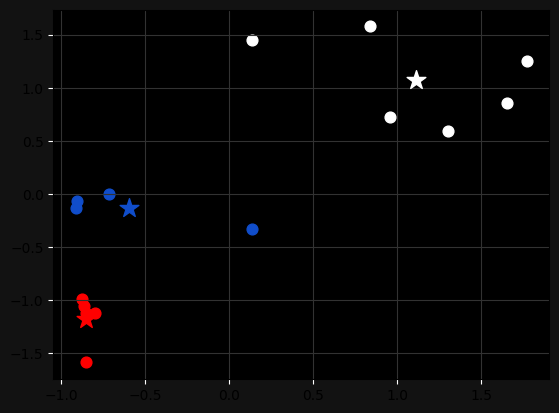

In [160]:
 visualization(clusters, centroids)

In [161]:
# Static mapping of original to standardized values
static_mapping = {
    (23000, 54): [-0.90577183, -0.07026335],
    (15000, 59): [0.13629754, -0.33375091],
    (16000, 46): [-0.91277341, -0.13613524],
    (1000, 18): [-0.71556208, -0.00439146],
    (19000, 44): [-0.79724725, -1.1242136],
    (300, 20): [-0.87893241, -0.99246982],
    (70, 34): [-0.86726311, -1.05834171],
    (400, 19): [-0.8555938, -1.58531683],
    (9000, 57): [1.77000091, 1.24717446],
    (9000, 30): [0.83645613, 1.57653391],
    (10, 33): [0.95314923, 0.72019934],
    (500, 11): [1.30322852, 0.58845555],
    (22000, 48): [0.13629754, 1.44479013],
    (500, 18): [1.65330781, 0.85194312]
}